In [31]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


data1 = np.load("./datasets/Gabi.npy")
data2 = np.load("./datasets/Jesse.npy")

data1.shape, data2.shape

((28, 1000, 4), (28, 1000, 4))

### Organizando dados


- Removendo dois últimos eletródos não utilizados no experimento
- Arrumando a dimensão dos dados
  - Deixando os dados como última coluna 
  

In [32]:

# os dois primeiros eletrodos são funcionais
data1 = data1[:,:,0:2]
data2 = data2[:,:,0:2]

data = np.array([data1, data2])

print(data.shape)

# colocando os dados na dimensão final
data = data.transpose(0, 1, 3, 2)
data.shape

(2, 28, 1000, 2)


(2, 28, 2, 1000)

In [33]:
def butter_bandpass(data, lowcut, highcut, fs=512, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=512, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

*Tarefa 1*: Realizem a aplicaçao dos filtros para toda a base.


- Aplicando filtros nos dados
- Plotando exemplos de trials

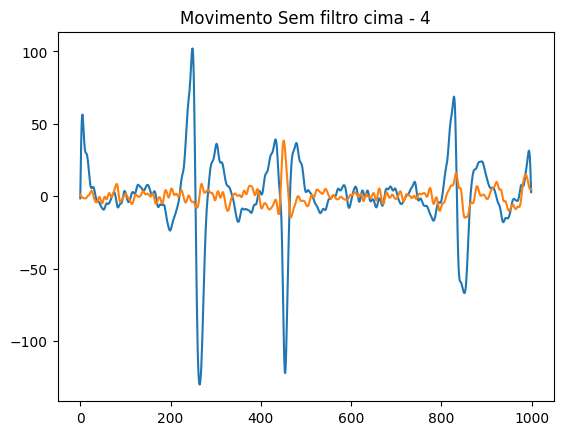

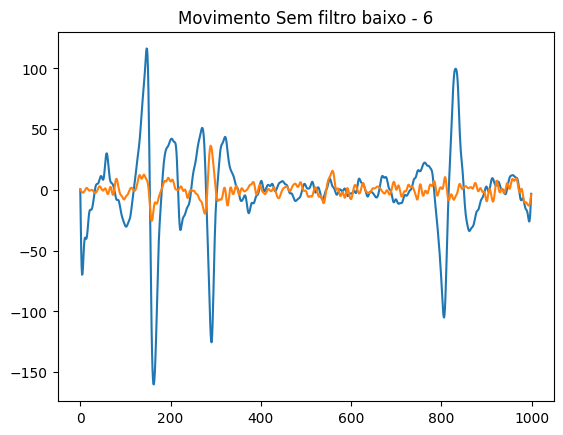

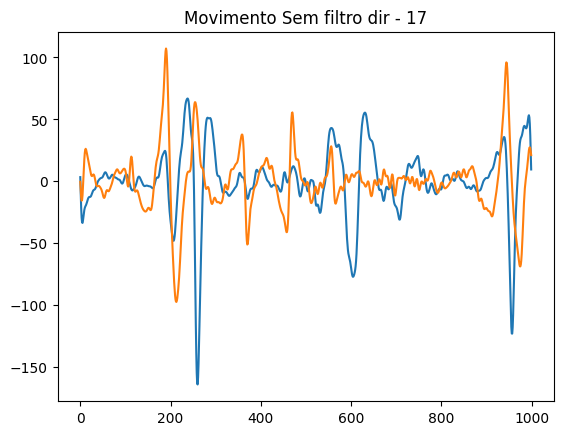

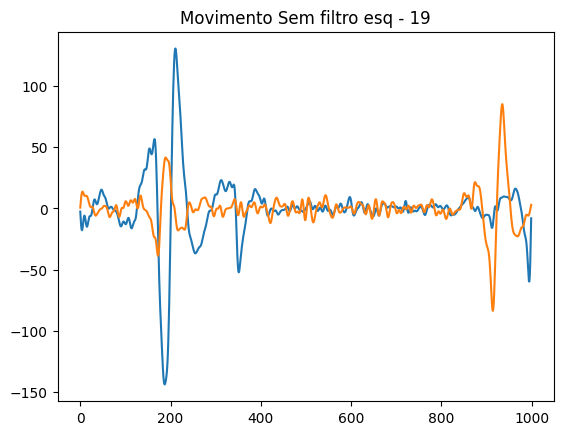

In [34]:
# Aplicação dos filtros
# Mostrar até  (5 - 50hz)

# aplicação dos filtros
data_filtered = data
data_filtered = butter_notch(data, 60) #remove frequencia equivalente a rede eletrica do brasil
data_filtered = butter_bandpass(data_filtered, 5, 50) 

labels_str = ['dir', 'esq', 'cima', 'baixo', 'cima', 'baixo',
'baixo', 'esq', 'dir', 'baixo', 'dir', 'dir', 'esq', 'cima',
'baixo', 'cima', 'esq', 'dir', 'cima', 'esq', 'baixo', 'esq',
'dir', 'esq', 'cima', 'dir', 'cima', 'baixo']

for target in [4, 6, 17, 19]:
    plt.plot(data_filtered[0, target, 0, :])
    plt.plot(data_filtered[0, target, 1, :])
    plt.title(f"Movimento Sem filtro {labels_str[target]} - {target}")
    plt.show()

### Obtendo janelas de tempo e frequência

- Foi realizado os cortes de limites inferiores e superiores na dimensão dos dados

In [35]:
# Aplicação da segmentação (dom. tempo e frequência)

# Alterar valores abaixo para melhorar resultado do SVM
# data = data_filtered[:, :, :, 100:900] # 0.42857142857142855
# data = data_filtered[:, :, :, 150:800] # 0.42857142857142855
data = data_filtered[:, :, :, 200:700] # 0.21428571428571427
# data = data_filtered[:, :, :, 200:400] # 0.2857142857142857
step = 1
segment = 64

while True:

    n_win = int((data.shape[-1] - segment) / step) + 1
    ids = np.arange(n_win) * step

    # Janelas do dado no dominio do tempo
    chunks_time = np.array([data[:,:,:,k:(k + segment)] for k in ids])
    chunks_time = chunks_time.transpose(1, 2, 3, 0, 4)

    # Janelas do dado no domínio da frequência
    _, _, chunks_freq = signal.stft(data, fs=200, nperseg=segment, noverlap=32)
    chunks_freq = chunks_freq.transpose(0, 1, 2, 4, 3)

    if chunks_time.shape[3] == chunks_freq.shape[3]:
        break
    else:
        step += 1

print('Formato (shape) dos dados depois da divisão de janelas')
print(f'Dominio do tempo: {chunks_time.shape} - (partipantes, trials, eletrodos, janelas, valores)')
print(f'Dominio da frequência:  {chunks_freq.shape} - (partipantes, trials, eletrodos, janelas, valores)')


Formato (shape) dos dados depois da divisão de janelas
Dominio do tempo: (2, 28, 2, 17, 64) - (partipantes, trials, eletrodos, janelas, valores)
Dominio da frequência:  (2, 28, 2, 17, 33) - (partipantes, trials, eletrodos, janelas, valores)


*Tarefa 2*: Separar os participantes e armazenar os dados em disco para execução das proximas tarefas


In [36]:
print(chunks_freq[0].shape, chunks_freq[0].shape)
print(chunks_time[1].shape, chunks_time[1].shape)

gabi_freq = chunks_freq[0]
gabi_time = chunks_time[0]

jesse_freq = chunks_freq[1]
jesse_time = chunks_time[1]

np.save("./datasets/all_freq", chunks_freq)
np.save("./datasets/all_time", chunks_time)


np.save("./datasets/gabi_freq", gabi_freq)
np.save("./datasets/gabi_time", gabi_time)

np.save("./datasets/jesse_freq", jesse_freq)
np.save("./datasets/jesse_time", jesse_time)

(28, 2, 17, 33) (28, 2, 17, 33)
(28, 2, 17, 64) (28, 2, 17, 64)
